# Pedo-climat

Potentiel combiné de la qualité du sol et de la saison de croissance. / Combined potential of soil quality and growing season.

This notebook try to combine the best climat and the best soil for agriculture in the province of Quebec.

In [39]:
#loading librairies
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio.v2 as imageio

## Soil

To get the best soil, we going to use the ARDA notation (https://www.irda.qc.ca/fr/services/protection-ressources/sante-sols/information-sols/inventaire-terres-canada/).

Here's the map of the best soil in Quebec. Yellow and dark Yellow are the best.

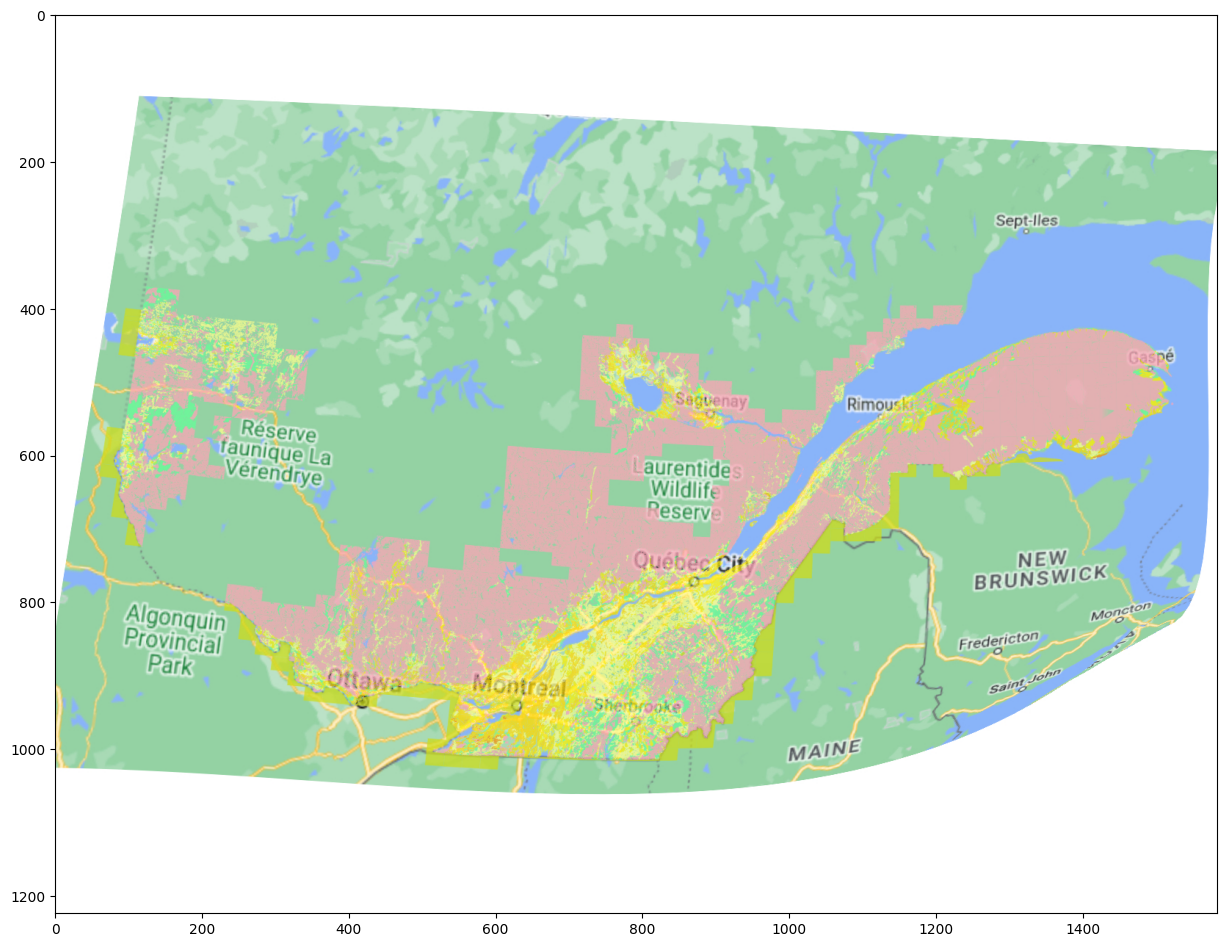

In [40]:
photo_data = imageio.imread('./arda-qc.jpg')

plt.figure(figsize=(15,15))
plt.imshow(photo_data)

Now, we are going to filter the map to keep only the best locations.

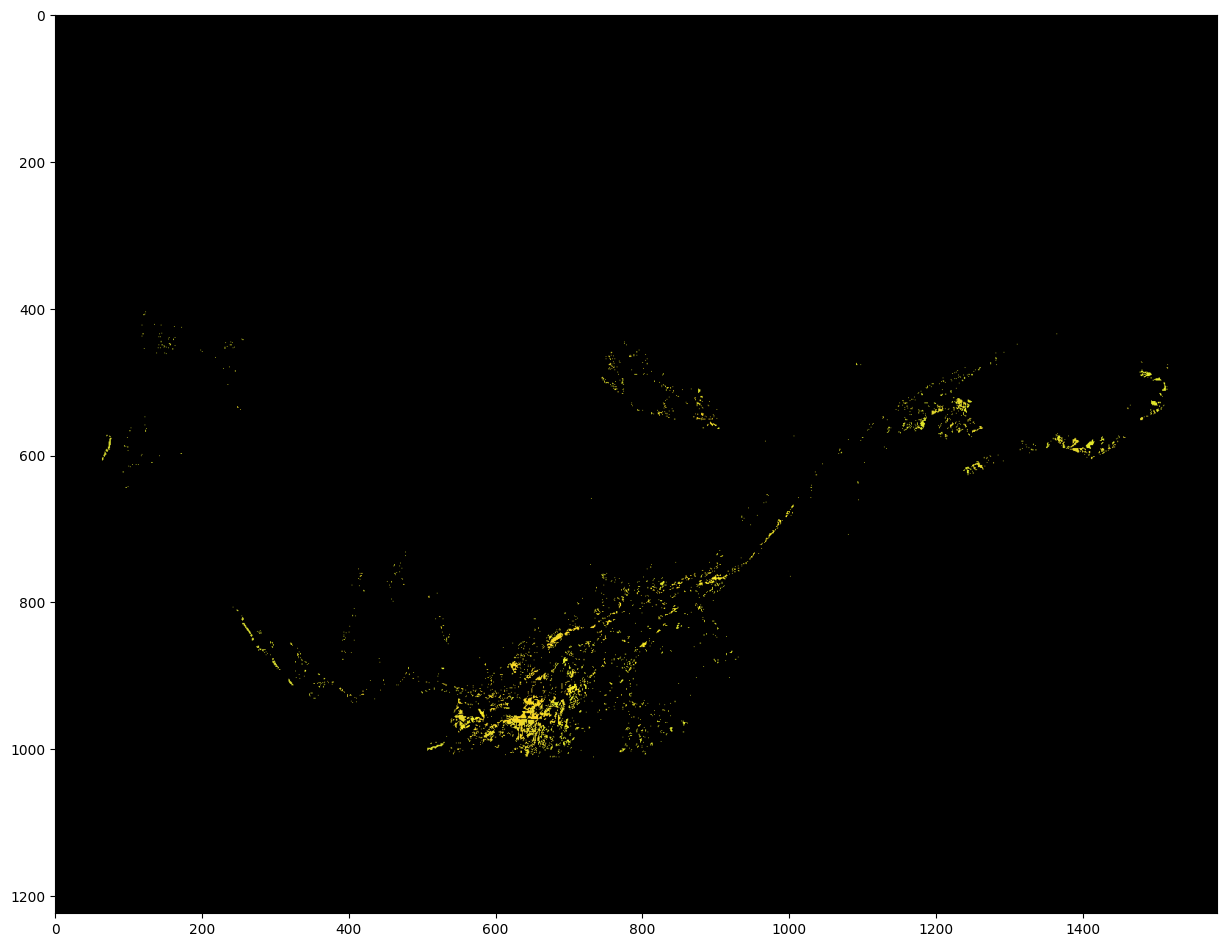

In [41]:
arda_data = imageio.imread('./arda-qc.jpg')
blue_mask  = arda_data[:, : ,2] > 50
red_mask  = arda_data[:, : ,0] < 210
green_mask  = arda_data[:, : ,1] < 200
arda_data[blue_mask] = 0
arda_data[red_mask] = 0
arda_data[green_mask] = 0

plt.figure(figsize=(15,15))
plt.imshow(arda_data)

## Climat

For the climat, we use the length of the season to decide where we get the best locations.

Let's load the map.

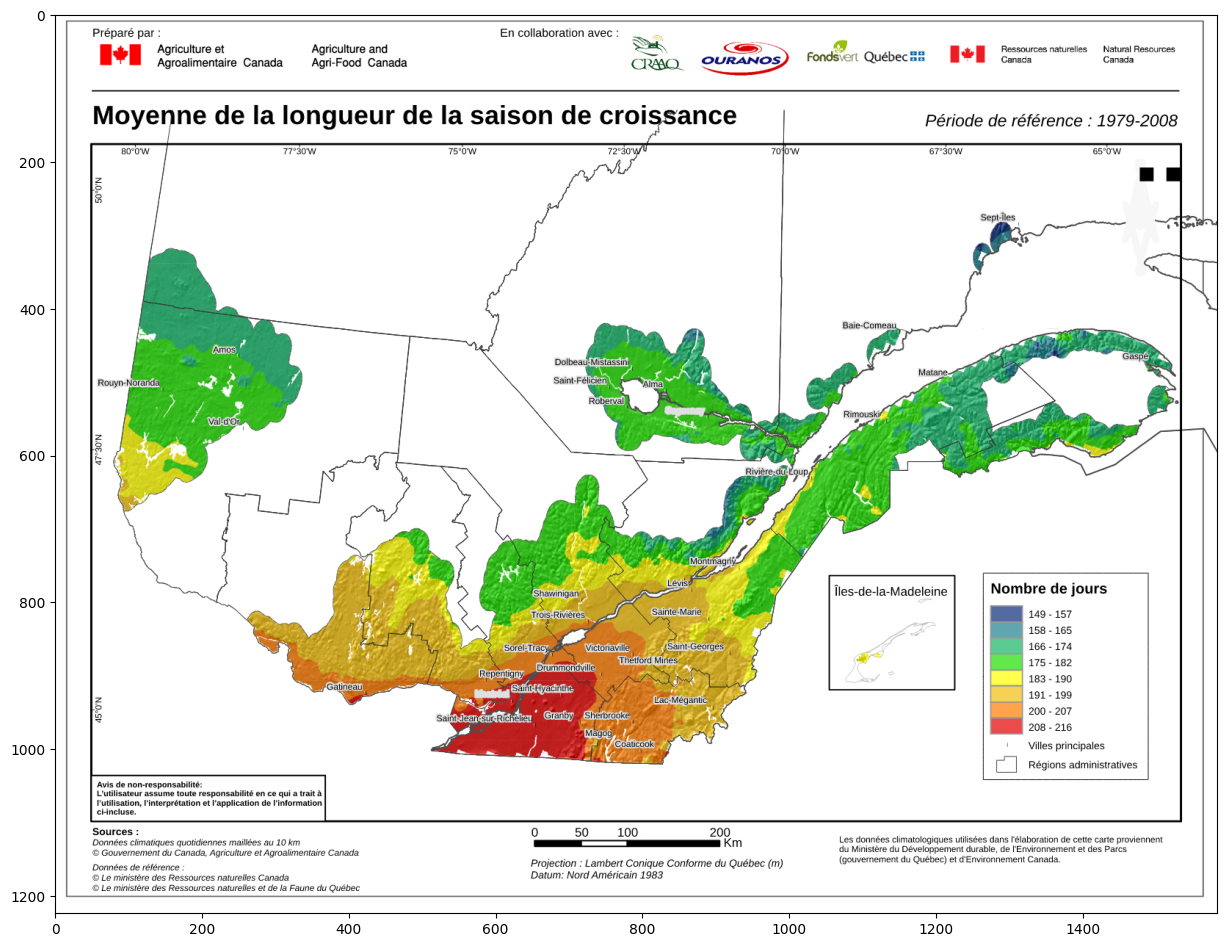

In [42]:
meteo_data = imageio.imread('./MOY_Long_1979_2008-pdf-3.jpg')

plt.figure(figsize=(15,15))
plt.imshow(meteo_data)

As we did for the soil, let's filter only the longuest season.

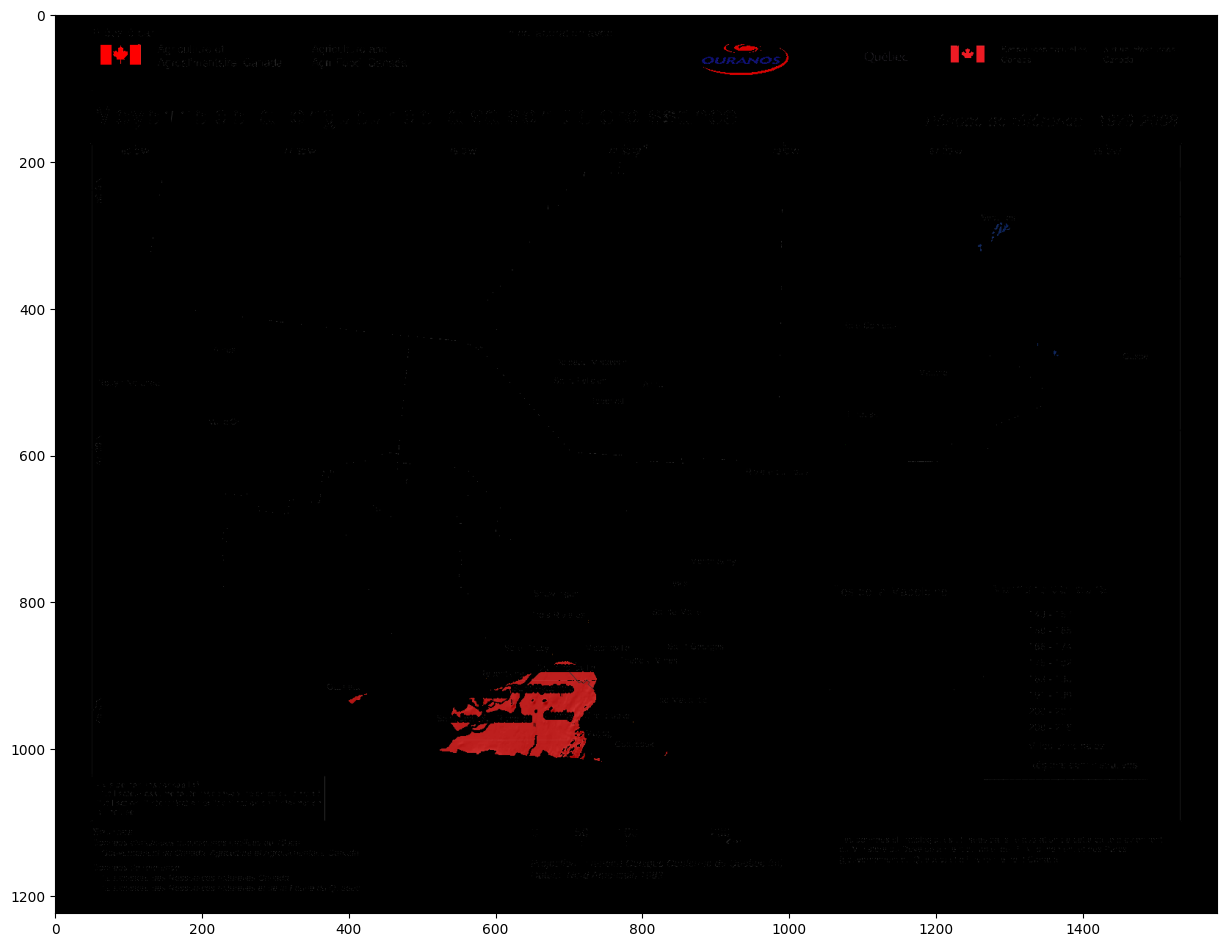

In [43]:
climat_data = imageio.imread('./MOY_Long_1979_2008-pdf-3.jpg')
mask_longeur_saison  = climat_data[:, : ,1] > 50

climat_data[mask_longeur_saison] = 0
plt.figure(figsize=(15,15))
plt.imshow(climat_data)

We need to combine the soil with the climat.

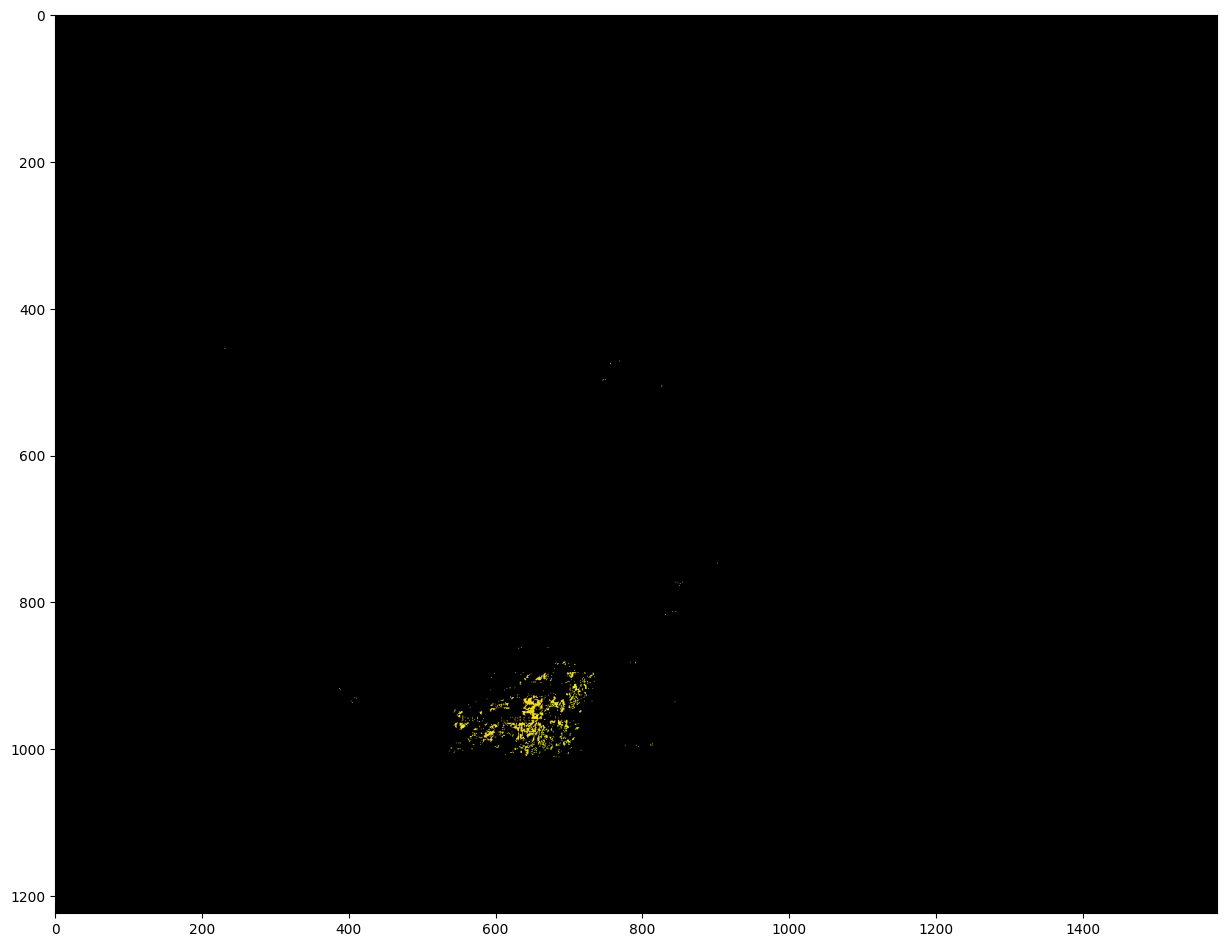

In [44]:
arda_data[mask_longeur_saison] = 0
plt.figure(figsize=(15,15))
plt.imshow(arda_data)

We are going to create a map to show the results

In [48]:
#Creating an empty map
meteo_data_empty = imageio.imread('./MOY_Long_1979_2008-pdf-3.jpg')
red  = meteo_data[:, : ,0] > 120
blue  = meteo_data[:, : ,1] > 100
green  = meteo_data[:, : ,2] > 100

meteo_data_empty[red] = 255
meteo_data_empty[blue] = 255
meteo_data_empty[green] = 255


## Final result

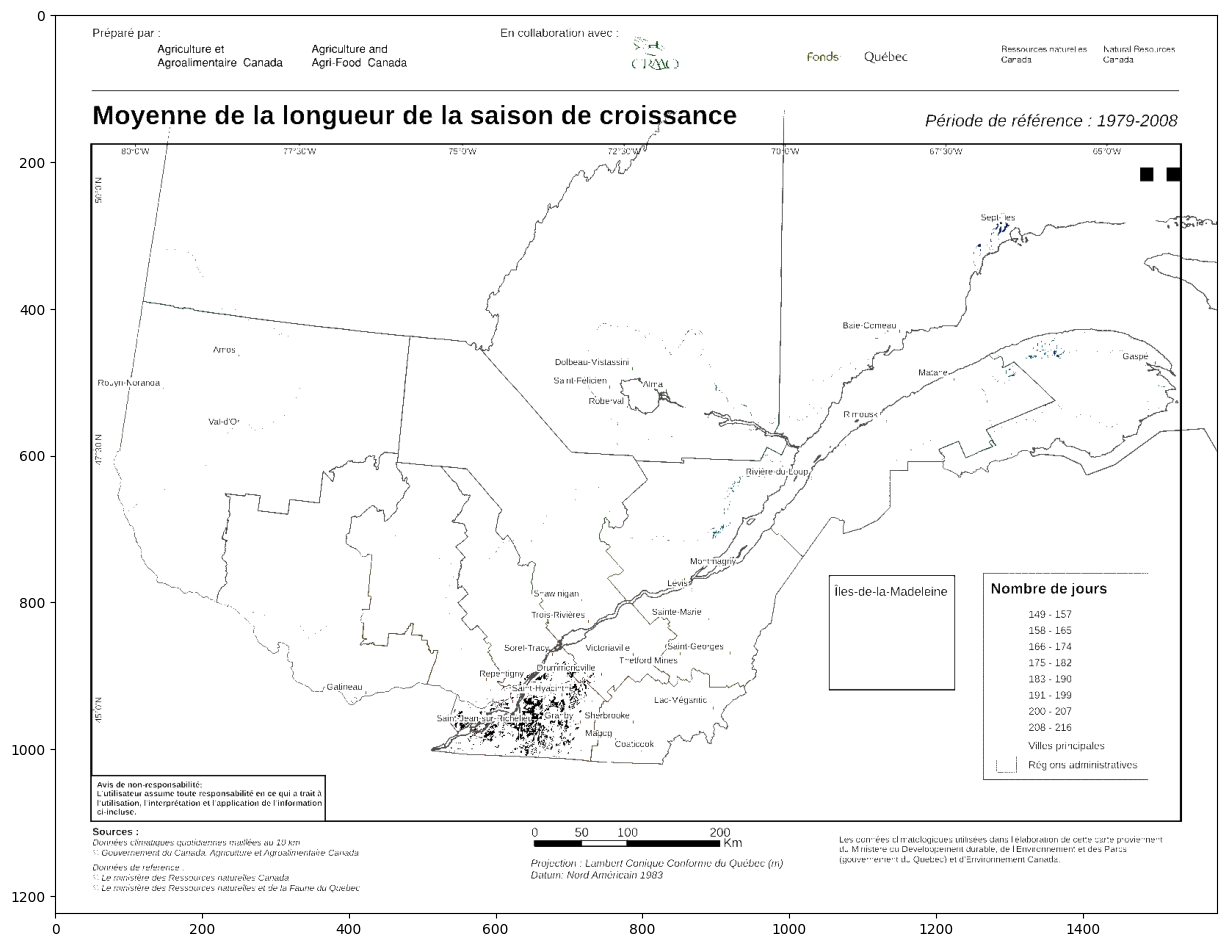

In [46]:
mask_final = arda_data[:, : ,1] > 10
meteo_data_empty[mask_final] = 0

plt.figure(figsize=(15,15))
plt.imshow(meteo_data_empty)

The dark dots are the best place to cultivate when we look a the soil and the length of the season.